<a href="https://colab.research.google.com/github/BerhanuSaron/Finance-Projects/blob/main/Microsoft_Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
income_stmt = msft.financials
income_stmt

,2025-06-30,2024-06-30,2023-06-30,2022-06-30
Tax Effect Of Unusual Items,-7.708800e+07,-9.991800e+07,-2.850000e+06,4.375400e+07
Tax Rate For Calcs,1.760000e-01,1.820000e-01,1.900000e-01,1.310000e-01
Normalized EBITDA,1.606030e+11,1.335580e+11,1.051550e+11,9.990500e+10
Total Unusual Items,-4.380000e+08,-5.490000e+08,-1.500000e+07,3.340000e+08
Total Unusual Items Excluding Goodwill,-4.380000e+08,-5.490000e+08,-1.500000e+07,3.340000e+08
Net Income From Continuing Operation Net Minority Interest,1.018320e+11,8.813600e+10,7.236100e+10,7.273800e+10
Reconciled Depreciation,3.415300e+10,2.228700e+10,1.386100e+10,1.446000e+10
Reconciled Cost Of Revenue,8.783100e+10,7.411400e+10,6.586300e+10,6.265000e+10
EBITDA,1.601650e+11,1.330090e+11,1.051400e+11,1.002390e+11
EBIT,1.260120e+11,1.107220e+11,9.127900e+10,8.577900e+10


In [ ]:
selected = income_stmt.loc[
    ["Total Revenue", "Operating Income"]
]

selected

,2025-06-30,2024-06-30,2023-06-30,2022-06-30
Total Revenue,2.817240e+11,2.451220e+11,2.119150e+11,1.982700e+11
Operating Income,1.285280e+11,1.094330e+11,8.852300e+10,8.338300e+10


In [ ]:
df = selected.T

df

,Total Revenue,Operating Income
2025-06-30,2.817240e+11,1.285280e+11
2024-06-30,2.451220e+11,1.094330e+11
2023-06-30,2.119150e+11,8.852300e+10
2022-06-30,1.982700e+11,8.338300e+10


In [ ]:
df.columns = ["Revenue", "Operating Income"]
df

,Revenue,Operating Income
2025-06-30,2.817240e+11,1.285280e+11
2024-06-30,2.451220e+11,1.094330e+11
2023-06-30,2.119150e+11,8.852300e+10
2022-06-30,1.982700e+11,8.338300e+10


In [ ]:
df["Operating Margin"] = df["Operating Income"] / df["Revenue"]
df

,Revenue,Operating Income,Operating Margin
2025-06-30,2.817240e+11,1.285280e+11,0.456220
2024-06-30,2.451220e+11,1.094330e+11,0.446443
2023-06-30,2.119150e+11,8.852300e+10,0.417729
2022-06-30,1.982700e+11,8.338300e+10,0.420553


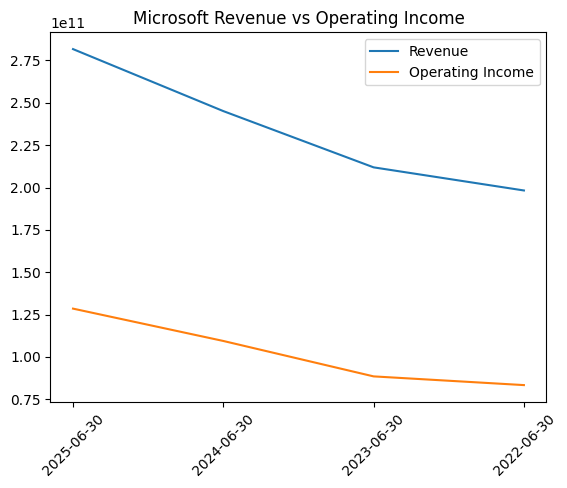

In [ ]:
df_plot = df.copy()
df_plot.index = df_plot.index.astype(str)

plt.figure()
plt.plot(df_plot.index, df_plot["Revenue"], label="Revenue")
plt.plot(df_plot.index, df_plot["Operating Income"], label="Operating Income")
plt.title("Microsoft Revenue vs Operating Income")
plt.legend()
plt.xticks(rotation=45)
plt.show()

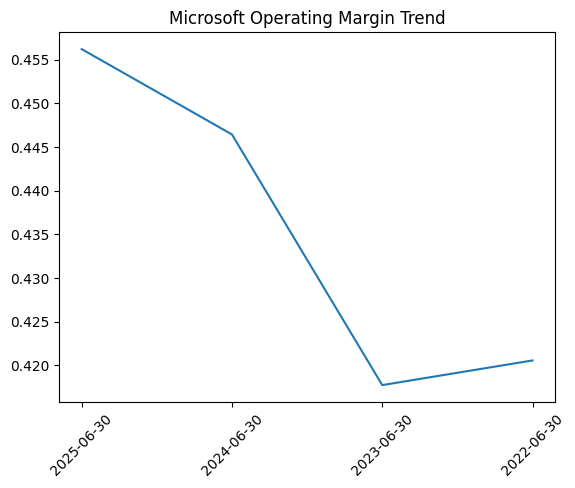

In [ ]:
plt.figure()
plt.plot(df_plot.index, df_plot["Operating Margin"])
plt.title("Microsoft Operating Margin Trend")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_display = df.copy()

df_display["Revenue ($B)"] = df_display["Revenue"] / 1e9
df_display["Operating Income ($B)"] = df_display["Operating Income"] / 1e9
df_display["Operating Margin (%)"] = df_display["Operating Margin"] * 100

df_display[["Revenue ($B)", "Operating Income ($B)", "Operating Margin (%)"]]

,Revenue ($B),Operating Income ($B),Operating Margin (%)
2025-06-30,281.724,128.528,45.621956
2024-06-30,245.122,109.433,44.644300
2023-06-30,211.915,88.523,41.772881
2022-06-30,198.270,83.383,42.055278


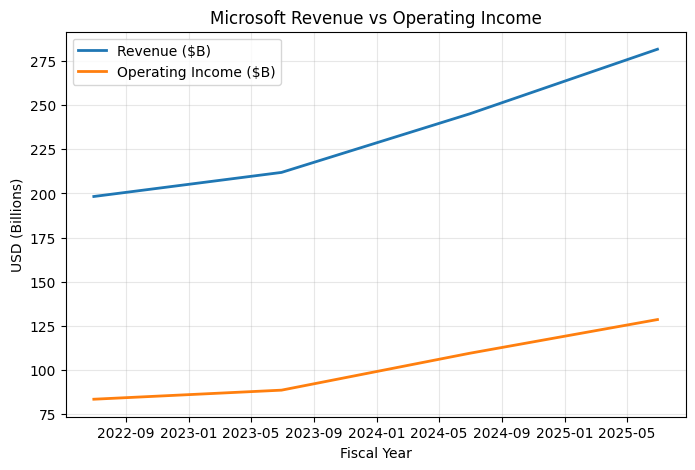

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_display.index, df_display["Revenue ($B)"], label="Revenue ($B)", linewidth=2)
plt.plot(df_display.index, df_display["Operating Income ($B)"], label="Operating Income ($B)", linewidth=2)

plt.title("Microsoft Revenue vs Operating Income")
plt.xlabel("Fiscal Year")
plt.ylabel("USD (Billions)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

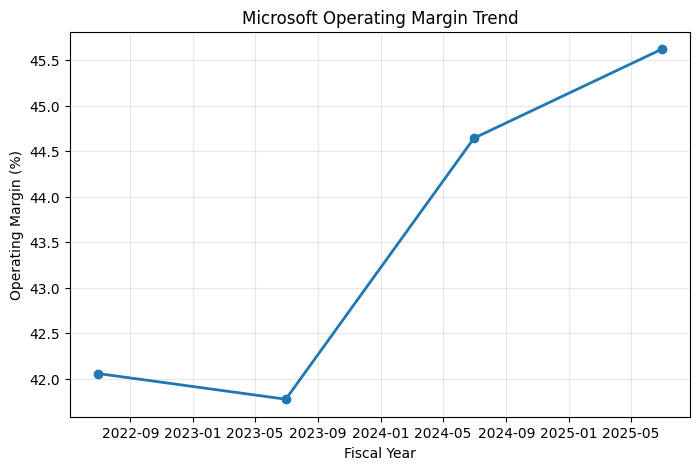

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(df_display.index, df_display["Operating Margin (%)"], marker="o", linewidth=2)

plt.title("Microsoft Operating Margin Trend")
plt.xlabel("Fiscal Year")
plt.ylabel("Operating Margin (%)")
plt.grid(alpha=0.3)

plt.show()